In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Part A

In [10]:
# Function Handels for Problem 1

def f(x):
    return np.power(np.pi,2)*np.sin(np.pi*x)

def q(x):
    return 0

def p(x):
    return 1

def u(x):
    return np.sin(np.pi*x)

# Function Handels for Problem 2

def f1(x):
    return -2*np.pi*np.cos(np.pi*x) + np.power(np.pi,2)*x*np.sin(np.pi*x) + x*np.power(np.sin(np.pi*x),2)

def q1(x):
    return np.sin(np.pi*x)

def p1(x):
    return 1

def u1(x):
    return x*np.sin(np.pi*x)

In [3]:
def geometry(Number_of_element):
    """
    Input  =  N(Number of Element)
    Output =  
    x_coord     : equispaced X point between 0,1
    Nodes       : Global Position of Nodes
    Quad_Point  : Quad Point Calculated by MID-POINT
    Quad_Weight : Weights W, Equispaced, X_1 - X_0
    """
    
    x_coord = [i/Number_of_element for i in range(Number_of_element+1)]
    Nodes = [(i,i-1,i) for i in range(1,Number_of_element+1)]
    Quad_Point  = [(x_coord[i] + x_coord[i-1])/2 for i in range(1,Number_of_element+1)]
    Quad_weight = [(x_coord[i] - x_coord[i-1]) for i in range(1,Number_of_element+1)]
    
    return x_coord,Nodes,Quad_Point,Quad_weight

In [4]:
def pw_linear_basis_function(x,n,x_coord):
    
    """
    Input   =
    x       : The Point where we need basis function value
    n       : The node point
    x_coord : equispaced X point between 0,1
    
    Output  =
    
    a tuple of (value of basic function at x, Derivative of basic function at x)
    """
    
    h = 1/(len(x_coord)-1)
      
    if(x_coord[n-1] <= x and x < x_coord[n]):
        return (x - x_coord[n-1])/h, -1/h
    
    elif(x_coord[n] <= x and x < x_coord[n+1]):
        return (x_coord[n+1] - x)/h, 1/h
    
    else:
        return 0,0 

In [5]:
def system_assembly(N,f,q,p):
    
    """
    INPUT:
    N :  Number of Nodes
    f,q,p :  Function handel for f,q,p
    
    Output:
    return Matrix M,S,F
    
    """
    
    M = np.zeros((N,N))
    S = np.zeros((N,N))
    F = np.zeros((N,1))
    h = 1/N
    x_coord,Nodes,Quad_Point,Quad_weight = geometry(N)
    
    for I in range(N):
        
        Bases  = Nodes[I][1:]
        x_l    = Quad_Point[I]
        w_l    = Quad_weight[I]
        
        
        for i in Bases:
            if(i!=N):
                F[i] = F[i] + f(x_l)*w_l*pw_linear_basis_function(x_l,i,x_coord)[0]

                for j in Bases:
                    if(j!=N):
                        
                        M[i][j] = M[i][j] + q(x_l)*w_l*pw_linear_basis_function(x_l,i,x_coord)[0]*pw_linear_basis_function(x_l,j,x_coord)[0]

                        S[i][j] = S[i][j] + p(x_l)*w_l*pw_linear_basis_function(x_l,i,x_coord)[1]*pw_linear_basis_function(x_l,j,x_coord)[1]
     
    
    # Note :- I have omitted out the calculation for phi 0 and phi last nodes, since the value given at that point can be given
    #         by boundary condition (coeff = 0). 
    return M[1:N,1:N],S[1:N,1:N],F[1:N]   

In [6]:
def solve(N,f,q,p,u,name):
    
    """
    INPUT:
    N     :  Number of Nodes
    f,q,p :  Function handel for f,q,p
    name  :  The file name used to save the graph 
    
    Output:
    return 0, and save the graph
    
    """
    
    M,S,F = system_assembly(N,f,q,p)
    C = np.linalg.solve(M+S,F)
    C = np.insert(C,0,0)
    C = np.insert(C,len(C),0)
    plt.plot(C,'o-',label = "Coeff")
    X = np.linspace(0,1,N+1)
    plt.plot(u(X),marker = 11,markersize = 12,label = "True")
    plt.xlabel("Number of Nodes")
    plt.ylabel("U")
    plt.title("For N = " + str(N))
    plt.legend()
    plt.savefig(name)
    return 0

## Problem 1

In [7]:
x_coord,Nodes,Quad_Point,Quad_weight = geometry(4)
print("x_coord :",x_coord)
print("Nodes :",Nodes)
print("Quad_point : ",Quad_Point)
print("Quad_weight : ",Quad_weight)

x_coord : [0.0, 0.25, 0.5, 0.75, 1.0]
Nodes : [(1, 0, 1), (2, 1, 2), (3, 2, 3), (4, 3, 4)]
Quad_point :  [0.125, 0.375, 0.625, 0.875]
Quad_weight :  [0.25, 0.25, 0.25, 0.25]


## Problem 2

In [8]:
x_list = [0.125,0.375,0.5,0.675,0.8]

for x in x_list:
    temp = pw_linear_basis_function(x,2,x_coord)
    print("Value of basis function phi_2 at x : "+ str(x) + " is " + str(temp[0])+" and Derivative : " + str(temp[1]))
x_coord

Value of basis function phi_2 at x : 0.125 is 0 and Derivative : 0
Value of basis function phi_2 at x : 0.375 is 0.5 and Derivative : -4.0
Value of basis function phi_2 at x : 0.5 is 1.0 and Derivative : 4.0
Value of basis function phi_2 at x : 0.675 is 0.2999999999999998 and Derivative : 4.0
Value of basis function phi_2 at x : 0.8 is 0 and Derivative : 0


[0.0, 0.25, 0.5, 0.75, 1.0]

## Problem 3

In [11]:
N = 4
M,S,F = system_assembly(N,f,q,p)
print("Mass Matrix ")
print(M)
print("Stiffness Matrix ")
print(S)
print("Matrix F ")
print(F)

Mass Matrix 
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
Stiffness Matrix 
[[ 8. -4.  0.]
 [-4.  8. -4.]
 [ 0. -4.  8.]]
Matrix F 
[[1.61190745]
 [2.27958138]
 [1.61190745]]


## Problem 4
### N = 8

0

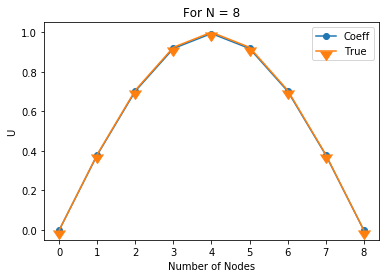

In [49]:
solve(8,f,q,p,u,"8a")

### N = 16

0

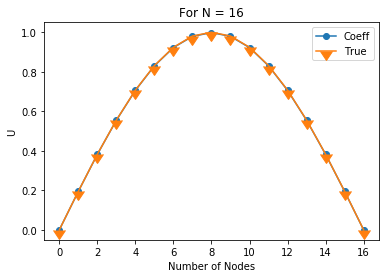

In [50]:
solve(16,f,q,p,u,"16a")

### N = 32

0

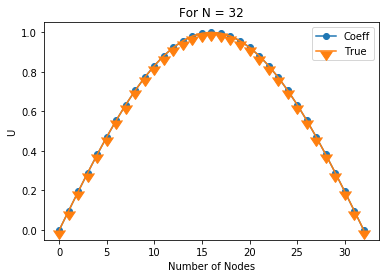

In [51]:
solve(32,f,q,p,u,"32a")

## Problem 2
### N = 8

0

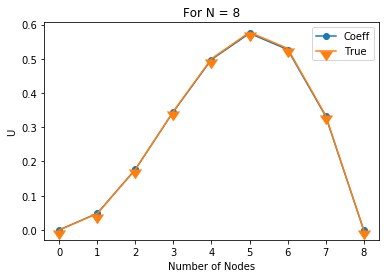

In [52]:
solve(8,f1,q1,p1,u1,"8b")

### N = 16

0

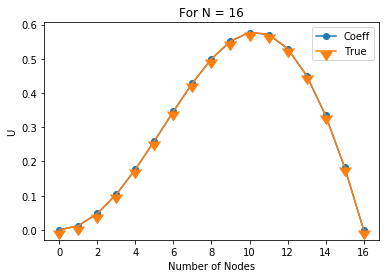

In [53]:
solve(16,f1,q1,p1,u1,"16b")

### N = 32

0

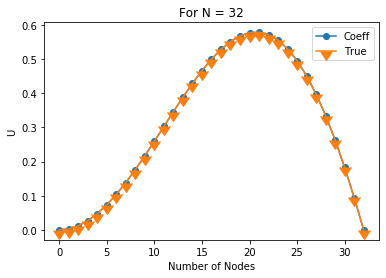

In [54]:
solve(32,f1,q1,p1,u1,"32b")